# Modelos de Color en OpenCV

En esta practica, se aprenderá sobre los modelos de color populares utilizados en la visión por computadora y los se utilizará para la segmentación basada en el color. Aprenderemos las siguientes funciones:

<ul>
    <li>Separar canales de color</li>
    <li>Convertir modelos de color</li>
    <li>Segmentacion en base al color</li>
</ul>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

Un <b>modelo de color</b> es un modelo matemático que describe cómo se pueden representar los colores como tuplas de números enteros, normalmente como tres o cuatro valores o componentes de color. Cuando este modelo se combina con una explicación detallada de cómo deben entenderse los componentes, teniendo en cuenta la percepción visual, el conjunto de colores resultante se denomina <b><i>espacio de color</i></b>. Hay numerosos espacios de color, y cada uno tiene una aplicación única.
<ul>
    <li>RGB (rojo, verde, azul)</li>
    <li>CMYK (cian, magenta, amarillo, negro)</li>
    <li>HSV (tono, saturación, valor)</li>
</ul>

Estos son algunos de los espacios de color más utilizados. Un espacio de color es una valiosa herramienta conceptual para comprender las capacidades de color de un dispositivo específico o de un archivo digital. Al intentar replicar el color en otro dispositivo, los espacios de color pueden demostrar si se pueden conservar los detalles de las sombras y las luces y la saturación del color, y en qué medida.

Para el restante de la practica, se utilizara la siguiente imagen a color.

<center><img src='Imagenes\Stardew Valley.jpg' width=400></center>

In [2]:
img_stdwval = cv2.imread('Imagenes/Stardew Valley.jpg', cv2.IMREAD_ANYCOLOR)

Para visualizar mejor como funciona cada espacio de color, se utiliza el comando `split()`, que convierte un arreglo multicanal a varios arreglos monocanal separados.

#### Sintaxis de Función

``` python
mv = cv2.split(M)
```

`mv`: Vector de salida de arreglos; los propios arreglos se realocan, si es necesario.

La función tiene **1 argumento de entrada requerido**

1. `m`: Arreglo multicanal fuente. Es un argumento **obligatorio**.


## Espacio RGB

Los componentes rojo, verde y azul se utilizan para representar los colores en el espacio de color más utilizado, el RGB (Red Green Blue). En términos más técnicos, RGB se refiere a un color como una tupla de tres componentes. Cada elemento puede representarse con un número entre 0 y 255, siendo la tupla (0, 0, 0) el negro y (255, 255, 255) el blanco.

El RGB se considera un espacio de color "aditivo", y los colores pueden crearse iluminando un fondo negro con grandes cantidades de luz roja, azul y verde.

<center><img src="Recursos\RGB.png" width=500></center>

El espacio de color por defecto de OpenCV es RGB. Sin embargo, en realidad almacena el color en el formato BGR. Es posible visualizar todos los canales por separado para entender como se relacionan con la imagen a color mediante `split()`.

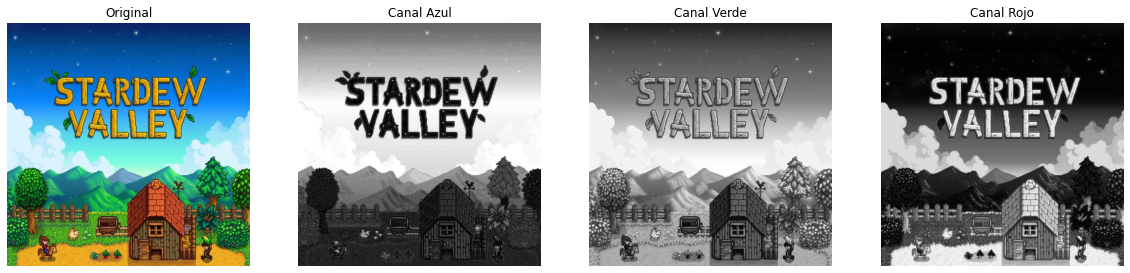

In [3]:
canal_B, canal_G, canal_R = cv2.split(img_stdwval)

imagenes = [img_stdwval, canal_B, canal_G, canal_R]
titulos = ['Original', 'Canal Azul', 'Canal Verde', 'Canal Rojo']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

Dado que cada canal puede tratarse como una imagen independiente, ahora pueden aplicarse a cada uno de ellos las funciones vistas anteriormente y por ver. Como ejemplo, se aplican conceptos de mejora de la imagen en el canal azul de la imagen anteriormente dividida.

Text(0.5, 1.0, 'Canal Azul')

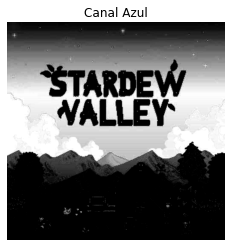

In [4]:
canal_B = cv2.subtract(canal_B, 100)

plt.imshow(canal_B, cmap='gray')
plt.axis('off')
plt.title('Canal Azul')

Si se desea observar cómo ha afectado este cambio a la imagen en color, se puede utilizar el comando `merge()` para volver a combinar los canales en una imagen en color. La función `merge()` combina múltiples matrices en una única matriz multicanal. Es decir, cada elemento de la matriz de salida será una concatenación de los elementos de las matrices de entrada, con los elementos de la matriz de entrada i-ésima. Es la acción opuesta a `split()`.

#### Sintaxis de Función

``` python
dst = cv2.merge(mv)
```

`dst`: Matriz de salida. Tendrá el mismo tamaño y profundidad que `mv[0]`, con el número de canales igual al número de parámetros.

La función tiene **1 argumento de entrada requerido**

1. `mv`: Matriz de entrada de las matrices a fusionar; todas las matrices en `mv` deben tener el mismo tamaño y la misma profundidad. Es un argumento **obligatorio**.

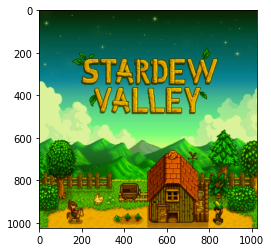

In [5]:
nueva_img = cv2.merge([canal_R, canal_G, canal_B])

plt.imshow(nueva_img)

Se observa como la imagen perdio tonalidades de azul.

## Espacio CMYK

CMYK es útil en la industria de la impresión porque especifica las mezclas de colores necesarias para crear un color a partir de un fondo blanco. En CMYK, la tupla (0,0,0) es blanca en lugar de negra como en RGB.

Los cartuchos de tinta cian, magenta, amarillo y negro están presentes en nuestras impresoras. Es un espacio de color sustractivo, a diferencia del RGB. El paradigma CMYK oculta algunos o todos los colores sobre un fondo más claro, normalmente blanco. La luz que normalmente se reflejaría es disminuida por la tinta.

<center><img src='Recursos\CMY.png' width=350></center>

## Conversion entre espacios de color

El espacio BGR es el utilizado por OpenCV para procesar imagenes, pero es posible trabajar con espacios de colores distintos mediante conversiones entre espacios. Para cambiar el espacio de color de una imagen, OpenCV ofrece la función `cvtColor()`. La función convierte una imagen de entrada de un espacio de color a otro. Al convertir desde o hacia el espacio de color RGB, el orden de los canales debe estar claramente indicado (RGB o BGR).

#### Sintaxis de Función

``` python
dst = cv2.cvtColor(src, code)
```

`dst`: Imagen de salida del mismo tamaño y profundidad que src.

La función tiene **2 argumento de entrada requerido**

1. `src`: Imagen de entrada. Es un argumento **obligatorio**.
2. `code`: Uno de los códigos de conversión del espacio de color, este debe ser uno de los códigos proporcionados en la documentacion <i>ColorConversionCodes</i>.

## Espacio HSI/HSV

Las descripciones de tono, saturación y valor/iluminación conocidas como HSV (a veces HSI) son especialmente útiles para detectar el contraste en las fotografías. Estos espacios de color se utilizan a menudo en los programas de selección de color y en el diseño web. En forma de cilindro relleno de puntos de color RGB, contiene información sobre el color. Se esfuerza por capturar los colores tal y como los ve el ojo humano. Los valores de matiz, saturación y valor oscilan entre 0-179, 0-255 y 0-255, respectivamente. Su principal aplicación es la segmentación del color.

<center><img src='Recursos\HSV.png' width=350></center>

Es posible visualizar, mediante la conversion de color, como es que la imagen es separada en los canales de matiz, saturacion y valor.

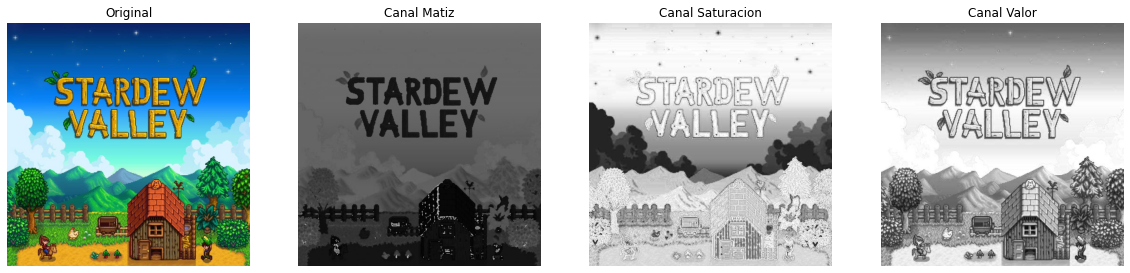

In [6]:
img_hsv = cv2.cvtColor(img_stdwval, cv2.COLOR_BGR2HSV)

canal_H, canal_S, canal_V = cv2.split(img_hsv)

imagenes = [img_stdwval, canal_H, canal_S, canal_V]
titulos = ['Original', 'Canal Matiz', 'Canal Saturacion', 'Canal Valor']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

## Espacio Lab

Un espacio de color más preciso es Lab Color. Para designar los colores, utiliza tres valores (L, a y b). Al indicar a un dispositivo la cantidad de cada color que necesita, los espacios de color RGB y CMYK determinan un color. El funcionamiento de Lab Color es más parecido al del ojo humano. Utiliza una técnica de tres ejes para especificar el color: el eje de luminosidad, el eje b y el eje a (del verde al rojo).

El espacio de color RGB y el espacio de color Lab son muy diferentes. Los tres canales que componen el espacio de color RGB se utilizan para separar la información de color de la información de brillo. En cambio, el canal L del espacio de color Lab sólo codifica el brillo y no está conectado a ninguna información de color. Los dos canales adicionales representan el color.

<center><img src='Recursos\Lab.png' width=350></center>

El hecho de que Lab Color funcione en cualquier dispositivo es su mejor característica. Esto implica que es más sencillo conseguir el mismo tono exacto en varios medios. Se utiliza sobre todo en las industrias textil, del automóvil y del plástico.

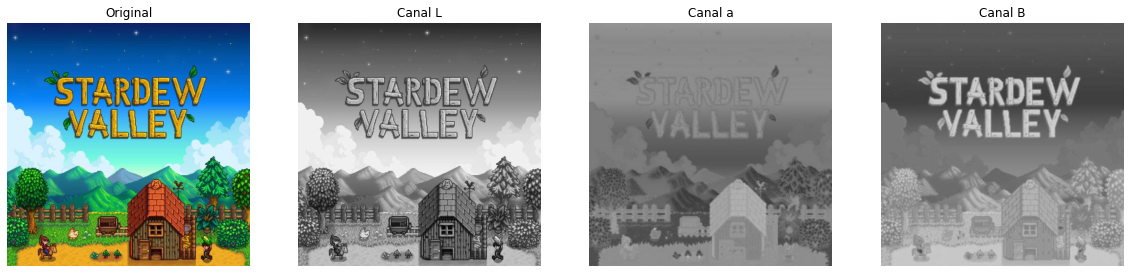

In [7]:
img_lab = cv2.cvtColor(img_stdwval, cv2.COLOR_BGR2LAB)

canal_L, canal_a, canal_b = cv2.split(img_lab)

imagenes = [img_stdwval, canal_L, canal_a, canal_b]
titulos = ['Original', 'Canal L', 'Canal a', 'Canal B']

plot_img(imagenes, titulos)
imagenes.clear()
titulos.clear()

## Segmentacion de color

El proceso de segmentación implica la agrupación de varias cosas en grupos que corresponden a la misma categoría de objeto o color. En OpenCV, la segmentación de color o el filtrado de color se utiliza frecuentemente para identificar objetos o regiones particulares que tienen un color determinado. Esto se hace mediante un umbral y una máscara para separar los distintos colores con el fin de identificar una región que contiene un color particular. Como los colores en el espacio de color HSV están mucho más localizados y pueden distinguirse fácilmente, es mucho más adecuado para este propósito.

Para ver por qué, comparemos la imagen en los espacios de color RGB y HSV viendo la distribución del color de sus píxeles. HSV es una buena elección de espacio de color para segmentar por colores. Esto se ilustra muy bien con una figura en 3D, donde cada eje representa uno de los canales del espacio de color.

Se utiliza un conjunto de datos de peces dorados para mostrar cómo se utiliza el método de segmentación del espacio de color. Será más sencillo de visualizar, ya que todos están formados por el mismo color naranja reconocible.

<center><img src='Imagenes\Pez Dorado1.jpg' width=400></center>

Para visualizarlo, se necesitan varias bibliotecas de Matplotlib adicionales para crear la grafica.

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


#### Visualizando el espacio RGB

Las características necesarias para el trazado de la grafica son proporcionadas por estas bibliotecas. Cada píxel debe colocarse según sus partes constitutivas y colorearse según su color. Para ello, se utilizará la función `split()` para graficar dichos puntos.

In [9]:
img_pez = cv2.imread('Imagenes\Pez Dorado1.jpg', cv2.IMREAD_ANYCOLOR)
img_pez = cv2.resize(img_pez, None, fx=0.3, fy=0.3)
img_pez = cv2.cvtColor(img_pez, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img_pez)

Después, hay que hacer un poco de remodelación y procesamiento para mostrar el valor en un gráfico 3D. El tipo de gráfico más adecuado será el de dispersión `scatter()`.

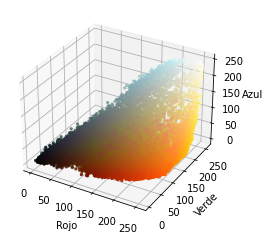

In [10]:
pixel_colors = img_pez.reshape((np.shape(img_pez)[0]*np.shape(img_pez)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Rojo")
axis.set_ylabel("Verde")
axis.set_zlabel("Azul")
plt.show()

Las partes anaranjadas de la imagen cubren prácticamente toda la gama de valores rojos, verdes y azules, como puede verse en este gráfico. El pez está dividido en segmentos de rangos de valores amplios en el espacio RGB, es por esto que es difícil segmentar la imagen en este espacio de color, ya que algunas áreas del pez abarcan toda la grafica.

#### Visualizando el espacio HSV

Ahora se realiza el mismo procedimiento en espacio HSV.

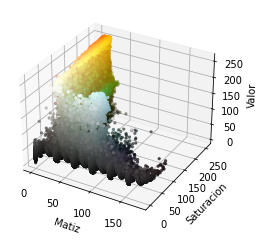

In [11]:
img_pez_hsv = cv2.cvtColor(img_pez, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(img_pez_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Matiz")
axis.set_ylabel("Saturacion")
axis.set_zlabel("Valor")
plt.show()

Los naranjas del pez están mucho más localizados y se distinguen visualmente en el espacio HSV. Aunque la saturación y el valor de las naranjas varían, están contenidas principalmente dentro de un rango estrecho a lo largo del eje del tono. Este es el principal factor que puede utilizarse para la segmentación.

### Elección de la gama

Se establece una simple gama de naranjas como nuestro criterio para el pez dorado. Para ello, se utiliza un selector de color para calcular un valor aproximado para el naranja del pez dorado.



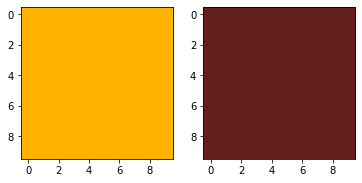

In [12]:
naranja_oscuro = (1,180,100)
naranja_claro = (30,255,255)

# Normalizacion de valores de 0-1 para visualizacion

nc_norm = np.full((10, 10, 3), naranja_oscuro, dtype=np.uint8) / 255.0
nf_norm = np.full((10, 10, 3), naranja_claro, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(nf_norm))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(nc_norm))
plt.show()

Una vez se tenga una gama de colores respetable, se intenta umbralizar al pez usando `inRange()`. Esta determina si los elementos de una matriz están intercalados entre los de otras dos matrices.

#### Sintaxis de Función

``` python
dst = cv2.inRange(src, lowerb, upperb)
```

`dst`: Matriz de salida de tipo CV_8U y del mismo tamaño que src.

La función tiene **3 argumento de entrada requerido**

1. `src`: Imagen de entrada. Es un argumento **obligatorio**.
2. `lowerb`: Un escalar o una matriz de límite inferior inclusivo. Es un argumento **obligatorio**.
3. `upperb`: Un escalar o una matriz de límite auperior inclusivo. Es un argumento **obligatorio**.


Esta funcion devuelve una máscara binaria, del tamaño de la imagen original, donde 1 denota valores dentro del rango y 0 denota valores fuera del rango.


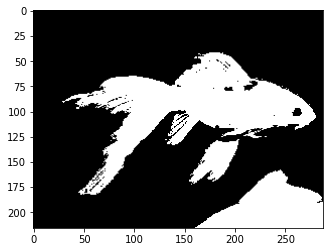

In [13]:
mascara_naranja = cv2.inRange(img_pez_hsv, naranja_oscuro, naranja_claro)

plt.imshow(mascara_naranja, cmap='gray')

Utilizando `bitwise_and()`, que mantiene cada píxel de la imagen suministrada si el valor correspondiente en la máscara es 1, se puede superponer la máscara sobre la imagen original.

#### Sintaxis de Función

``` python
dst = cv2.bitwise_and(src1, src2, mask)
```

`dst`: Matriz de salida que tiene el mismo tamaño y tipo que las matrices de entrada.

La función tiene **3 argumento de entrada requerido**

1. `src1`: Primer arreglo o escalar de entrada. Es un argumento **obligatorio**.
2. `src2`: Segundo arreglo o escalar de entrada. Es un argumento **obligatorio**.
3. `mask`: Máscara de operación opcional, matriz de 8 bits de un solo canal, que especifica los elementos de la matriz de salida que se van a cambiar. Es un argumento **obligatorio**.


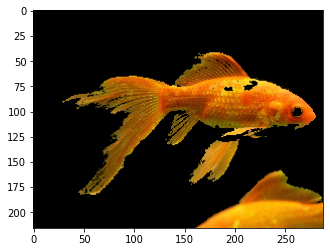

In [14]:
img_seg_naranja = cv2.bitwise_and(img_pez, img_pez, mask=mascara_naranja)

plt.imshow(img_seg_naranja)

Las secciones anaranjadas del pez ya han sido captadas bastante bien por el programa. El único problema es que el pez también tiene detalles blancos en la cola y aletas. Afortunadamente, haciendo lo mismo que se realizó con los naranjas, se puede añadir una segunda máscara que busque gamas blancas.

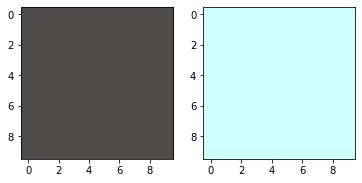

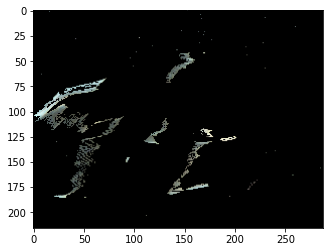

In [15]:
blanco_oscuro = (0, 15, 80)
blanco_claro = (125, 50, 255)

# Normalizacion de valores de 0-1 para visualizacion

bc_norm = np.full((10, 10, 3), blanco_claro, dtype=np.uint8) / 255.0
bo_norm = np.full((10, 10, 3), blanco_oscuro, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(bo_norm))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(bc_norm))
plt.show()

mascara_blanca = cv2.inRange(img_pez_hsv, blanco_oscuro, blanco_claro)
img_seg_blanco = cv2.bitwise_and(img_pez, img_pez, mask=mascara_blanca)

plt.imshow(img_seg_blanco)

Ahora se pueden combinar las máscaras. Dondequiera que haya naranja o blanco, la suma de las dos máscaras da como resultado valores verdaderos (1), que es precisamente lo que se necesita. Esta nueva mascara puede ser aplicada nuevamente para tener un resultado final.

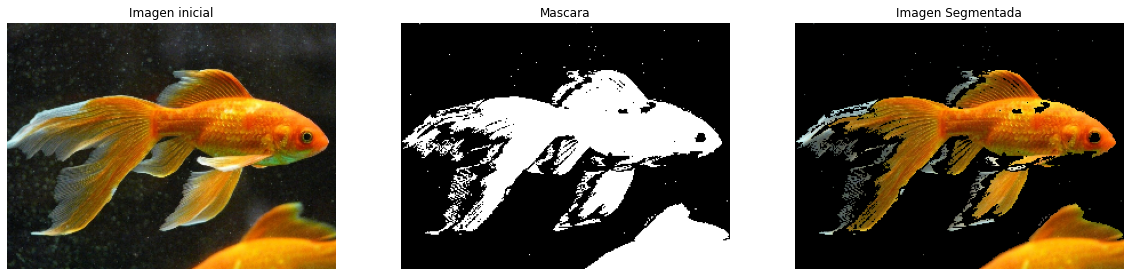

In [16]:
mascara_final = mascara_naranja + mascara_blanca

img_final = cv2.bitwise_and(img_pez, img_pez, mask=mascara_final)

img_pez = cv2.cvtColor(img_pez, cv2.COLOR_BGR2RGB)
img_final = cv2.cvtColor(img_final, cv2.COLOR_BGR2RGB)

imagenes = [img_pez, mascara_final, img_final]
titulos = ['Imagen inicial', 'Mascara', 'Imagen Segmentada']

plot_img(imagenes, titulos)

Vemos que el resultado final no es perfecto, sin embargo tenemos un resultado bastante fiel a lo deseado. Con un poco de post-procesamiento se pueden corregir algunos errores. Ahora, para profundizar aún más en el proceso de segmentación, se debe verificar si esta tecnica aplica para cualquier imagen de peces dorados. Para esto, se tienen otras imagenes prueba.

<center><img src='Imagenes\Pez Dorado2.jpg' height=300> <img src='Imagenes\Pez Dorado3.jpg' width=300> <img src='Imagenes\Pez Dorado4.jpg' width=300><img src='Imagenes\Pez Dorado5.jpg' width=300></center>

In [17]:
path = 'Imagenes/Pez Dorado'

peces = []
for i in range(5):
    pez = cv2.cvtColor(cv2.imread(path + str(i+1) + '.jpg'), cv2.COLOR_BGR2RGB)
    peces.append(pez)

Es posible combinar todo el codigo anterior en una sola funcion, que tome una imagen de entrada y retorne la imagen segmentada.

In [18]:
def segmentar_pez(imagen):

    # Convierte imagen a HSV
    img_hsv_pez = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)

    # Establecer el rango de color naranja
    naranja_oscuro = (1,180,100)
    naranja_claro = (30,255,255)

    # Encontrar mascara naranja
    mascara = cv2.inRange(img_hsv_pez, naranja_oscuro, naranja_claro)

    resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)

    return resultado

A continuación, se puede segmentar cada pez con la ayuda de la nueva función.

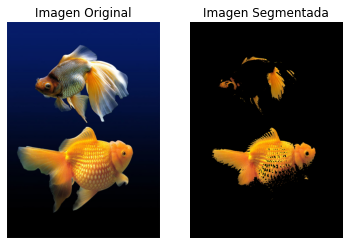

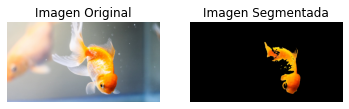

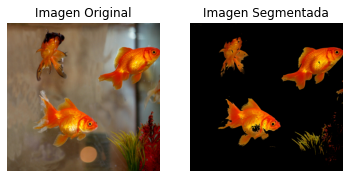

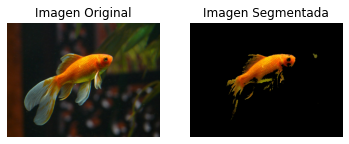

In [19]:
resultados = [segmentar_pez(pez) for pez in peces]

for i in range(1, 5):
    plt.subplot(1, 2, 1)
    plt.imshow(peces[i])
    plt.axis('off')
    plt.title('Imagen Original')
    plt.subplot(1, 2, 2)
    plt.imshow(resultados[i])
    plt.axis('off')
    plt.title('Imagen Segmentada')
    plt.show()
    

El resultado no es perfecto, pero en todas se ha logrado segmentar una gran parte de los peces dorados en la imagen. Esta claro que variables como el color del fondo y la iluminación cambian el resultado de la segmentación, y segmentar una imagen en particular con condiciones especificas no generaliza a todas las otras imagenes.

## Eventos de <i>mouse</i> en OpenCV

Un elemento crucial de una interfaz gráfica de usuario es el puntero del ratón (GUI). Así que vamos a empezar y aprender acerca de las características incorporadas en el ratón.

Varios tipos de eventos de ratón pueden ser controlados y gestionados ocasionalmente con la flexibilidad que proporciona OpenCV. Los eventos de ratón vienen en una variedad de formas, incluyendo clicks con el botón izquierdo, clicks con el botón derecho, doble click, etc. Es posible visualizar que tipos de eventos se pueden controlar y gestionar mediante OpenCV mediante el uso del siguiente script:

In [2]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print( events )

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


Mientras que la ventana o el marco está siendo abierto por OpenCV, debemos crear rutinas de devolución de llamada (<i>callbacks</i>) para cada tipo de evento de clic del ratón con el fin de gestionar estos eventos.

Para implementar el comportamiento que el programador requiera de un evento de click de ratón específico, estas funciones <i>callback</i> serán útiles. Esto es bastante fácil de lograr. Basta con construir una función de devolución de llamada en el código adjunto a la ventana OpenCV para completar la tarea. Para adjuntar la función <i>callback</i> a la ventana, se utiliza la función <code>cv2.setMouseCallback()</code>

#### Sintaxis de Función

``` python
cv2.setMouseCallback(winname, onMouse, userdata)
```

La función tiene **2 argumento de entrada requerido** y **1 argumento opcional**

1. `winname`: Nombre de la ventana. Es un argumento **obligatorio**.
2. `onMouse`: Función callback para eventos de ratón. Es un argumento **obligatorio**.
3. `userdata`: El parámetro opcional pasado a la llamada de retorno.

Para ilustrar como utilizar esta función, se crea una sencilla aplicación que dibuja un círculo sobre una imagen siempre que hagamos doble clic sobre ella.

Primero creamos una función callback del ratón que se ejecuta cuando se produce un evento del ratón. La creación de la función callback del ratón tiene un formato específico que es el mismo en todas partes. Sólo difiere en lo que hace la función. Así que nuestra función de llamada de retorno del ratón hace una cosa, dibuja un círculo donde hacemos doble clic.

In [6]:
# Crea una imagen negra
img = np.zeros((512,512,3), np.uint8)

# Función callback del ratón
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

Esta función por si sola no hace nada, ya que debe de ser emparejada mediante la funcion <code>cv2.setMouseCallback()</code>, a una ventana, y por ende, a una imagen.

Esto se realiza en el siguiente código.

In [4]:
cv2.namedWindow('Imagen')
cv2.setMouseCallback('Imagen',draw_circle)
while(1):
    cv2.imshow('Imagen',img)
    # Terminar el programa cuando se presione ESC
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

## Ejercicios
<br>
1. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargue una imagen del disco duro.</il>
    <li>Realice una conversión a un espacio de color diferente a BGR.</li>
    <li>La imagen original y su conversión deben de ser mostradas en ventanas distintas, cada una con su respectivo nombre.</li>
    <li>Las ventanas serán mostradas hasta que se presione le tecla <code>q</code></li>
    </ul>
<br>
2. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargue una imagen del disco duro.</il>
    <li>Realice una conversión a un espacio de color diferente a BGR.</li>
    <li>Dividir la imagen convertida en sus respectivos canales.</li>
    <li>Aplicar una operación de mejora de la imagen (suma, resta, etc.) a un canal de la imagen convertida.</li>
    <li>Converger los canales en una sola imagen multicanal.</li>
    <li>Mostrar las diferencias entre la imagen convertida y la imagen mejorada en la misma ventana.</li>
    </ul>
<br>
3. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargue una imagen a color del disco duro.</il>
    <li>Use una función callback para realizar segmentación de color en base al color que se le esté haciendo click en.</li>
    <li>Determine los criterios de segmentación más optimos para las imagenes.</li>
    <li>Se debe mostrar la imagen segmentada en sus propia ventana.</li>
    </ul>
<br>